# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Understanding the structure of the data

In [3]:
#Read the data from the csv file
orders_foodhub = pd.read_csv('foodhub-order.csv')

#Print the first 10 rows
orders_foodhub.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


### **Question 1:** How many rows and columns are present in the data?

In [6]:
#Print the number of rows and columns in the orders_foodhub table
orders_foodhub.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [7]:
#To print different columns in the table, we use info() function
orders_foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


##### OBSERVATIONS:
- The data consists of three distinct data types: int64, float64, and object.
- One column, cost_of_the_order, is of float64 data type.
- Four columns, namely order_id, customer_id, food_preparation_time, and delivery_time, are of int64 data type.
- Four columns, specifically restaurant_name, cuisine_type, day_of_the_week, and rating, are of object data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [8]:
orders_foodhub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

##### OBSERVATION:
- Upon initial inspection, it appears that all columns in the data do not contain any null values. As a result, there is no requirement for addressing missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [9]:
orders_foodhub.describe(include = 'all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [372]:
orders_foodhub.describe()['food_preparation_time'][['min', 'mean', 'max']]

min     20.00000
mean    27.37197
max     35.00000
Name: food_preparation_time, dtype: float64

##### OBSERVATIONS:
- The minimum food preparation time is 20 minutes.
- The average food preparation time is 27.37 minutes.
- The maximum food preparation time is 35 minutes.

### **Question 5:** How many orders are not rated? 

In [11]:
orders_foodhub['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [12]:
is_unrated = orders_foodhub['rating']=='Not given'
unrated = orders_foodhub[is_unrated]
unrated['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

##### OBSERVATIONS:
- There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

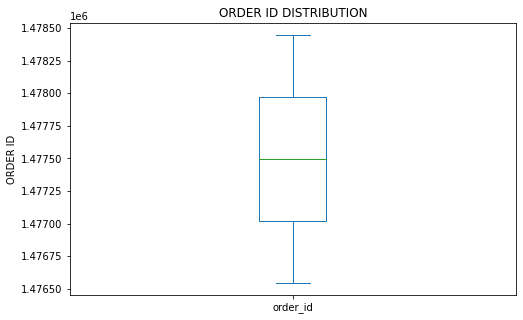

In [374]:
orders_foodhub['order_id'].plot(kind = 'box', figsize = (8, 5), title = 'ORDER ID DISTRIBUTION', ylabel = 'ORDER ID');

##### OBSERVATIONS:
- The Boxplot shows the distribution of the order_ids upper-boundary value, lower-boundary and median.
- Most of the order ids are between 147650 and 147850 and there are no outliers.

#### Customer ID

In [16]:
#Number of Customers
orders_foodhub['customer_id'].nunique()

1200

In [17]:
#TOP 10 CUSTOMERS WITH MOST ORDERS
orders_foodhub['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

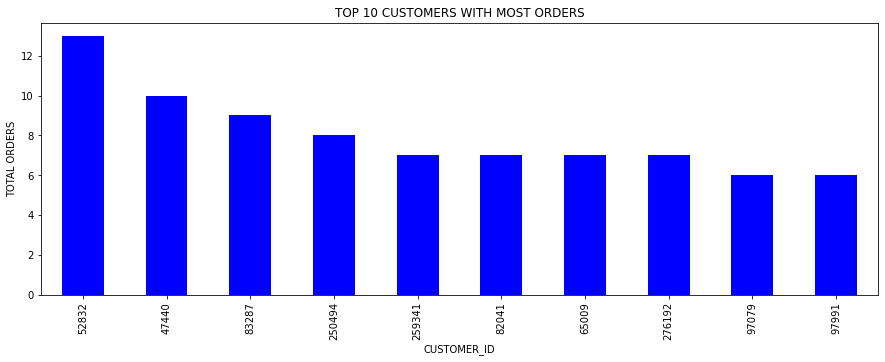

In [18]:
#TOP 10 CUSTOMERS WITH MOST ORDERS CHART
orders_foodhub['customer_id'].value_counts().head(10).plot(kind = 'bar', figsize = (15, 5), color = 'blue', 
    title = 'TOP 10 CUSTOMERS WITH MOST ORDERS', xlabel = 'CUSTOMER_ID', ylabel = 'TOTAL ORDERS');

In [19]:
#CUSTOMER ORDER DISTRIBUTION
orders_foodhub['customer_id'].value_counts().value_counts().sort_index(ascending = True)

1     784
2     267
3      83
4      33
5      19
6       6
7       4
8       1
9       1
10      1
13      1
Name: customer_id, dtype: int64

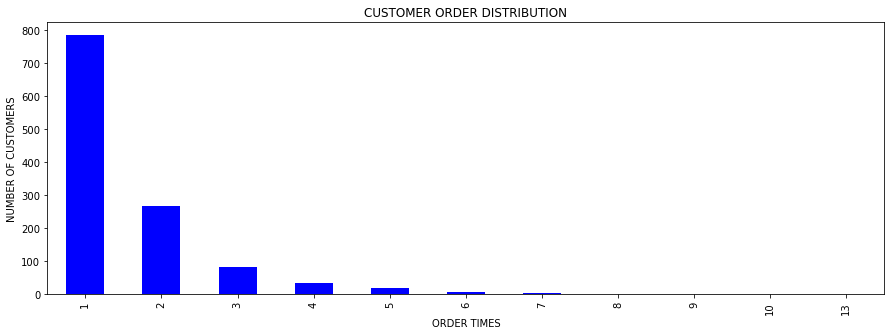

In [20]:
#CUSTOMER ORDER DISTRIBUTION CHART
orders_foodhub['customer_id'].value_counts().value_counts().sort_index(ascending = True).plot(kind = 'bar', 
    figsize = (15, 5), color = 'blue', title = 'CUSTOMER ORDER DISTRIBUTION'
    ,xlabel = 'ORDER TIMES', ylabel = 'NUMBER OF CUSTOMERS');

In [21]:
#AVERAGE CUSTOMER ORDER
round(orders_foodhub['customer_id'].value_counts().mean(), 2)

1.58

##### OBSERVATIONS:
- A total of 1200 customers have placed orders in all the restaurants.
- Customer ID 52832 holds the record for the highest number of orders, with a total of 13 orders.
- 784 of the customers placed orders only once, while the average number of orders per customer is 1.58.

#### Restaurant name

In [46]:
#Top 10 Restaurants with Most orders
orders_foodhub['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

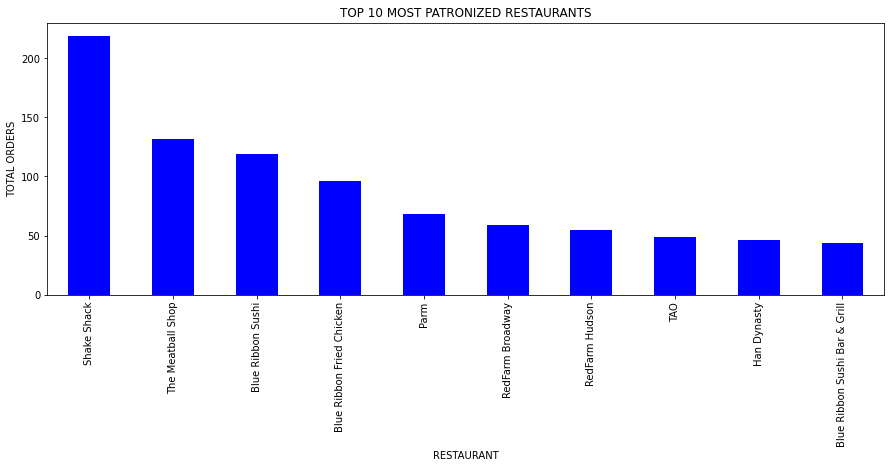

In [59]:
#RESTAURANT ORDER DISTRIBUTION CHART
orders_foodhub['restaurant_name'].value_counts().head(10).plot(kind = 'bar', figsize = (15, 5), color = 'blue', 
    title = 'TOP 10 MOST PATRONIZED RESTAURANTS', xlabel = 'RESTAURANT', ylabel = 'TOTAL ORDERS');

##### OBSERVATION:
- Shake Shack is the restaurant with the most orders with 219 orders.
- Sushi Choshi, Dos Caminos Soho, La Follia and Philippe Chow are some of the least patronized restaurants.

#### Cuisine type

In [48]:
#Ordered Cuisine
orders_foodhub['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

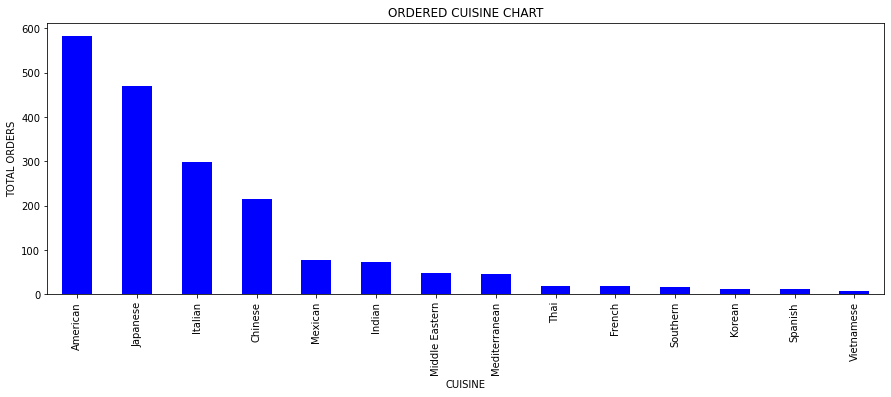

In [50]:
#Cuisine Order Chart
orders_foodhub['cuisine_type'].value_counts().plot(kind = 'bar', figsize = (15, 5), color = 'blue', 
    title = 'ORDERED CUISINE CHART', xlabel = 'CUISINE', ylabel = 'TOTAL ORDERS');

##### OBSERVATION:
- The American cuisine is the most order cuisine, having 584 orders while the Vietnamese cuisine is the least ordered, having only 7 orders.

#### Cost of the order

In [55]:
#Cost of order
orders_foodhub['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

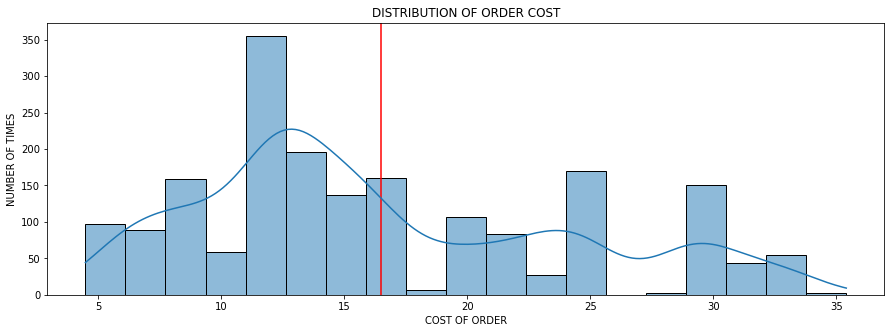

In [375]:
plt.figure(figsize=(15,5))
plt.title('DISTRIBUTION OF ORDER COST')
plt.xlabel('COST OF ORDER')
plt.ylabel('NUMBER OF TIMES')
plt.axvline(orders_foodhub['cost_of_the_order'].mean(), color='red')
sns.histplot(orders_foodhub['cost_of_the_order'], kde= True)
plt.show()

##### OBSERVATION:
- The least amount spent on an order is 4.47 USD.
- The maximum amount spent on an order costs 35.41 USD.
- The average cost of orders is 16.50 USD

#### Day of the week

In [97]:
orders_foodhub['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

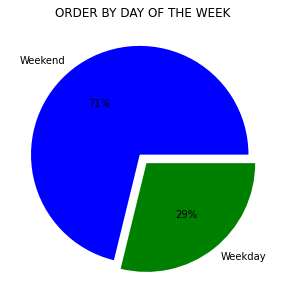

In [376]:
orders_foodhub['day_of_the_week'].value_counts().plot(kind = 'pie', figsize = (15, 5),  
    title = 'ORDER BY DAY OF THE WEEK', label = '', autopct = '%1.0f%%', explode = (0.05, 0.05), colors = ['blue','green']);

##### OBSERVATION:
- 71% of the orders were placed during the weekend while 547 orders were placed during the weekday.

#### Rating

In [125]:
orders_foodhub['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

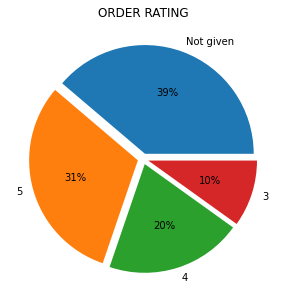

In [133]:
orders_foodhub['rating'].value_counts().plot(kind = 'pie', figsize = (15, 5),  
    title = 'ORDER RATING', label = '', autopct = '%1.0f%%', explode = (0.05, 0.05, 0.05, 0.05));

In [400]:
#Calculate the average Rating of the Rated Orders
rated_orders = orders_foodhub.drop(orders_foodhub[orders_foodhub['rating']=='Not given'].index)
rated_ratings = rated_orders['rating'].astype(int)
round(rated_ratings.mean(),1)

4.3

##### OBSERVATION:
- 736 orders were not rated. This is equivalent to 39% of the orders.
- Of the rated orders, 588 of the orders were rated 5.
- The average rating of the rated orders is 4.3.

#### Food Preparation time

In [179]:
orders_foodhub['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

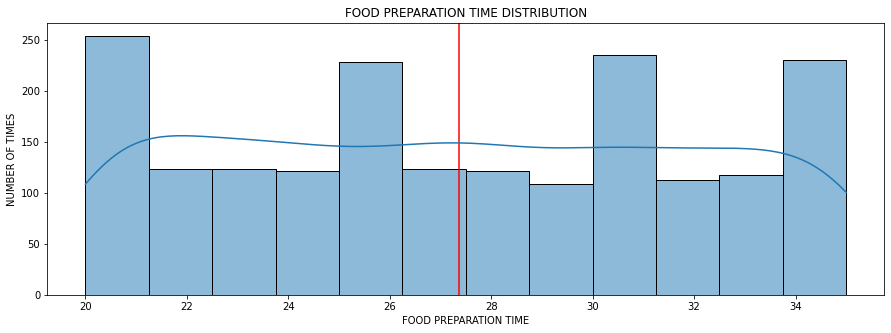

In [180]:
plt.figure(figsize=(15,5))
plt.title('FOOD PREPARATION TIME DISTRIBUTION')
plt.xlabel('FOOD PREPARATION TIME')
plt.ylabel('NUMBER OF TIMES')
plt.axvline(orders_foodhub['food_preparation_time'].mean(), color='red')
sns.histplot(orders_foodhub['food_preparation_time'], kde= True);

##### OBSERVATION:
- The least time take to prepare a food was 20 Minute while the longest it took to prepare a food was 35 Minutes.
- The average time taken to prepare all the foods ordered is 27.37 Minutes

#### Delivery time

In [186]:
orders_foodhub['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

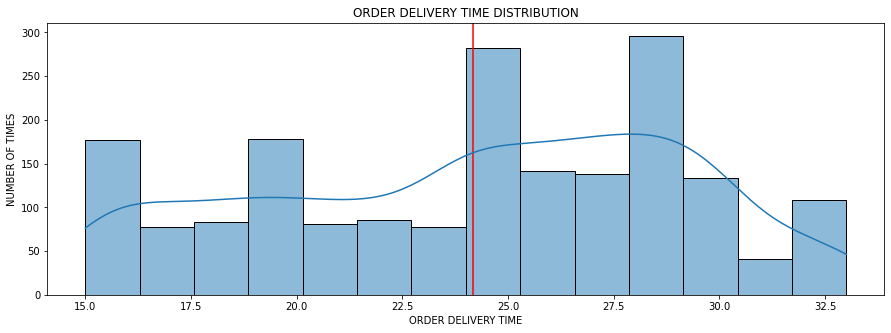

In [187]:
plt.figure(figsize=(15,5))
plt.title('ORDER DELIVERY TIME DISTRIBUTION')
plt.xlabel('ORDER DELIVERY TIME')
plt.ylabel('NUMBER OF TIMES')
plt.axvline(orders_foodhub['delivery_time'].mean(), color='red')
sns.histplot(orders_foodhub['delivery_time'], kde= True);

##### OBSERVATION:
- The fastest delivery time took 15 Minutes while the longest delivery time took 33 Minutes.
- On average, orders are delivered within 24.16 Minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [192]:
orders_foodhub['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends?

In [299]:
weekend_orders = orders_foodhub[orders_foodhub['day_of_the_week'] == 'Weekend']
weekend_orders['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

American cuisine is the most popular cuisine on weekends, with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [199]:
round(len(orders_foodhub[orders_foodhub['cost_of_the_order']>20])/len(orders_foodhub)*100,2)

29.24

- 29.24% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time?

In [200]:
round(orders_foodhub['delivery_time'].mean(), 2)

24.16

- The average order delivery time is 24.16 Minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [202]:
orders_foodhub['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

##### OBSERVATION:
*The IDs of the top 3 customers with most orders are:*
- 52832 made 13 orders,
- 47440 made 10 orders,
- 83287 made 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

In [234]:
orders_foodhub.groupby('cuisine_type')['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,16.319829,7.462290,4.71,12.0800,14.120,22.2600,33.18
Chinese,215.0,16.305209,7.631503,4.75,12.1050,14.120,21.8800,34.19
French,18.0,19.793889,6.508990,11.98,13.0525,20.470,23.6550,29.25
Indian,73.0,16.919726,7.897493,5.34,11.6400,16.150,24.2000,33.03
Italian,298.0,16.418691,7.268831,5.05,12.0800,14.480,22.2600,33.03
Japanese,470.0,16.304532,7.422722,4.47,12.0800,14.070,21.8300,33.37
Korean,13.0,14.001538,7.563540,5.77,11.8400,12.180,14.0200,30.75
Mediterranean,46.0,15.474783,7.604720,5.67,12.0925,13.995,18.7825,35.41
Mexican,77.0,16.933117,7.555108,4.85,12.0800,15.570,22.3600,33.32


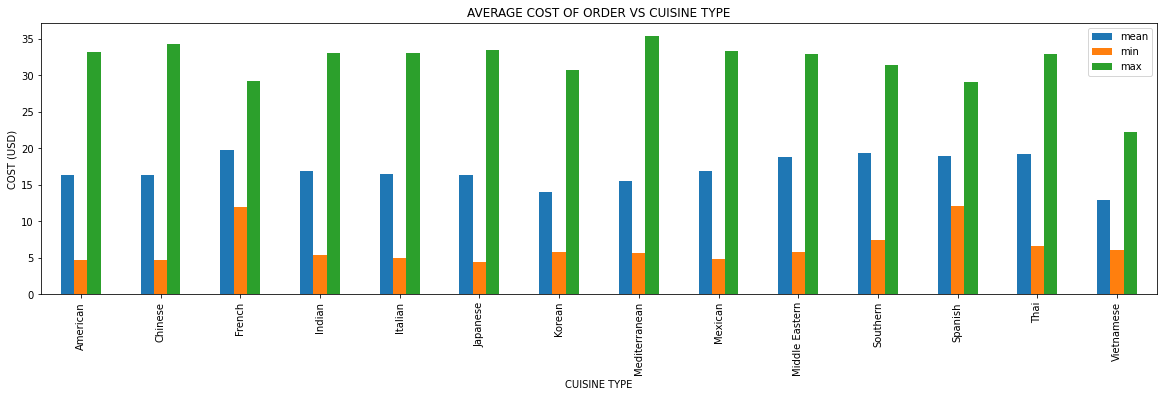

In [382]:
orders_foodhub.groupby('cuisine_type')['cost_of_the_order'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (20, 5), title = 'AVERAGE COST OF ORDER VS CUISINE TYPE',
xlabel = 'CUISINE TYPE', ylabel = 'COST (USD)');

##### OBSERVATION:
- The French cuisine has the highest average order cost while the Vietnamese cuisine has the least average order cost.

#### Cuisine vs Food Preparation time

In [237]:
orders_foodhub.groupby('cuisine_type')['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


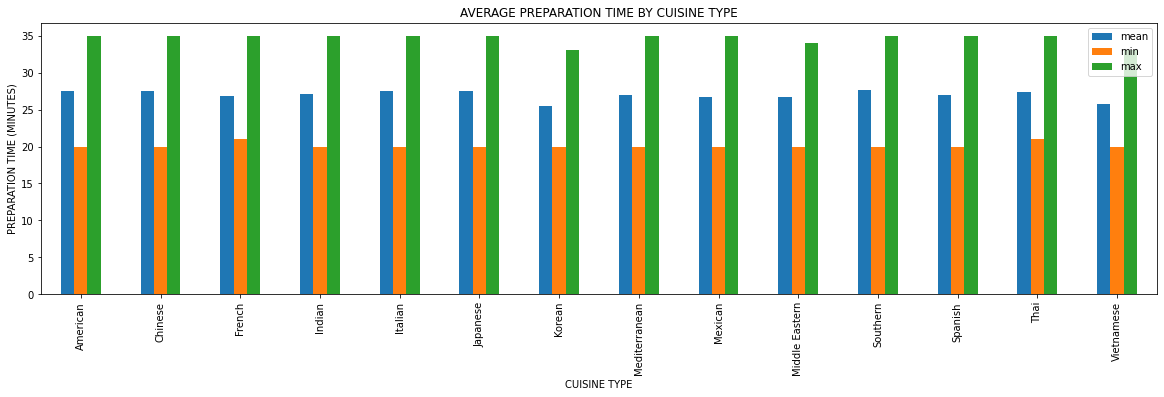

In [383]:
orders_foodhub.groupby('cuisine_type')['food_preparation_time'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (20, 5), title = 'AVERAGE PREPARATION TIME BY CUISINE TYPE',
xlabel = 'CUISINE TYPE', ylabel = 'PREPARATION TIME (MINUTES)');

##### OBSERVATION:
- On average, the Korean cuisine takes the shortest time to prepare while the Southern cuisine has the longest preparation time.
- Most cuisine have really close preparation time.
- The fastest time to prepare most of the cuisines is 20 minutes while the longest time it takes to prepare the cuisines is 35 minutes.

#### Day of the Week vs Delivery time

In [244]:
orders_foodhub.groupby('day_of_the_week')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


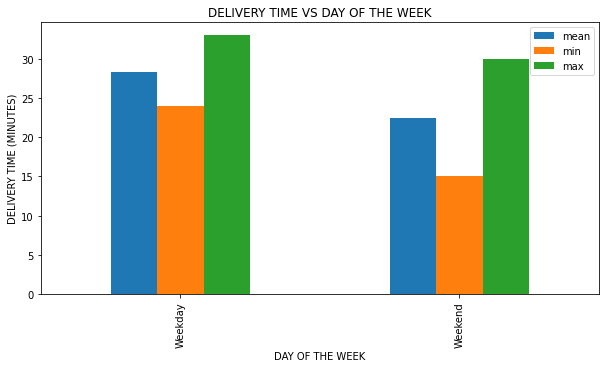

In [384]:
orders_foodhub.groupby('day_of_the_week')['delivery_time'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (10, 5), title = 'DELIVERY TIME VS DAY OF THE WEEK',
xlabel = 'DAY OF THE WEEK', ylabel = 'DELIVERY TIME (MINUTES)');

##### OBSERVATION:
- On average, it is faster to deliver customer orders durinf the weekend than during the weekday.

#### Day of the Week vs Food Preparation time

In [269]:
orders_foodhub.groupby('day_of_the_week')['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,27.212066,4.708616,20.0,23.0,27.0,31.0,35.0
Weekend,1351.0,27.436714,4.601476,20.0,23.0,27.0,31.0,35.0


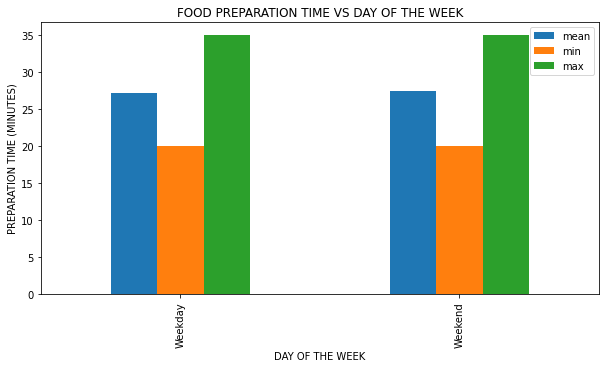

In [385]:
orders_foodhub.groupby('day_of_the_week')['food_preparation_time'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (10, 5), title = 'FOOD PREPARATION TIME VS DAY OF THE WEEK',
xlabel = 'DAY OF THE WEEK', ylabel = 'PREPARATION TIME (MINUTES)');

##### OBSERVATION:
- On average, it takes almost the same time to prepare the foods, regardless of the day the order is coming in

#### Rating vs Delivery time

In [276]:
orders_foodhub.groupby('rating')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,188.0,24.558511,4.652845,15.0,21.0,25.0,28.0,33.0
4,386.0,23.867876,4.923377,15.0,20.0,24.0,28.0,33.0
5,588.0,24.212585,5.018607,15.0,20.0,25.0,28.0,33.0
Not given,736.0,24.173913,5.041021,15.0,20.0,25.0,28.0,33.0


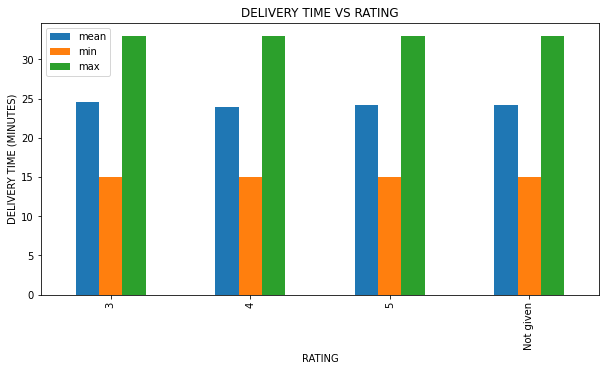

In [381]:
orders_foodhub.groupby('rating')['delivery_time'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (10, 5), title = 'DELIVERY TIME VS RATING',
xlabel = 'RATING', ylabel = 'DELIVERY TIME (MINUTES)');

##### OBSERVATION:
- On average, the orders rated 4 have the fastest delivery time.
- Orders not being rated have nothing to do with the delivery time  because, unrated orders have the second fastest delivery time. 

#### Rating vs Cost of the order

In [280]:
orders_foodhub.groupby('rating')['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,188.0,16.223351,7.840886,4.75,12.0425,14.120,21.8300,33.37
4,386.0,16.710337,7.632996,4.75,12.1300,14.160,22.7875,35.41
5,588.0,16.965697,7.448696,4.47,12.1300,15.205,22.8000,33.03
Not given,736.0,16.085340,7.327540,4.66,11.8275,14.070,21.5000,34.19


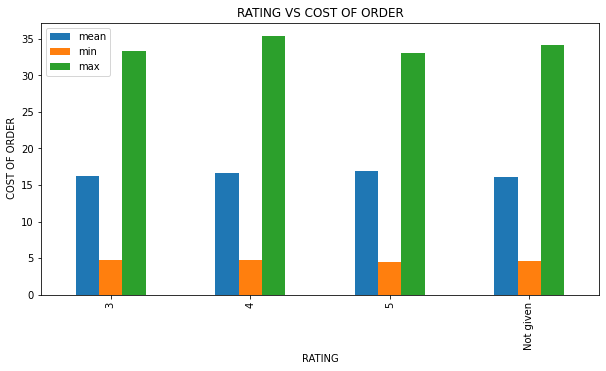

In [386]:
orders_foodhub.groupby('rating')['cost_of_the_order'].describe()[['mean', 'min', 'max']].plot(kind = 'bar'
,figsize = (10, 5), title = 'RATING VS COST OF ORDER',
xlabel = 'RATING', ylabel = ' COST OF ORDER');

##### OBSERVATION:
- On average, the least costly orders are unrated.
- Orders not being rated have nothing to do with the cost of order because, by default, if you get your orders at a lesser cost, you should rate the order well, at least.

#### Correlation among variables

In [298]:
orders_foodhub.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


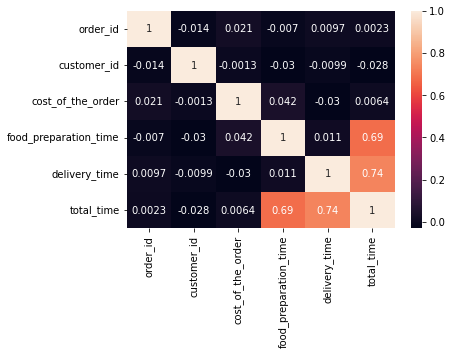

In [389]:
sns.heatmap(orders_foodhub.corr(), annot = True);

##### OBSERVATION:
- The correlation between most of the variables are negative and very low.
- So, rating, preparing time, delivery time, and order cost are not related.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [331]:
got_rated = orders_foodhub.drop(orders_foodhub[orders_foodhub['rating']=='Not given'].index)
rest_pop = got_rated.groupby('restaurant_name')['rating'].count()
rest_rating = got_rated.groupby('restaurant_name')['rating'].mean()

rest = pd.merge(rest_pop, rest_rating, how = 'inner', on = rest_pop.index)

rest[(rest['rating_x'] > 50) & (rest['rating_y'] > 4)]

,key_0,rating_x,rating_y
16,Blue Ribbon Fried Chicken,64,5.552274e+61
17,Blue Ribbon Sushi,73,6.089773e+70
117,Shake Shack,133,4.177018e+130
132,The Meatball Shop,84,6.494697e+81


##### OBSERVATION:
- There are 4 restaurants that qualify for the promotional offer. These restaurants have average rating greater than 4 and rating count more than 50. They are : Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [334]:
percent_25  = orders_foodhub[orders_foodhub['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25
percent_15  = orders_foodhub[orders_foodhub['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
net_revenue = percent_25 + percent_15
round(net_revenue, 2)

8379.54

##### OBSERVATION:
- The net revenue generated by the company across all orders is $8379.54


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [338]:
orders_foodhub['total_time'] = orders_foodhub['food_preparation_time'] + orders_foodhub['delivery_time']
round(len(orders_foodhub[orders_foodhub['total_time']>60]) / len(orders_foodhub) * 100, 2)

10.54

##### OBSERVATION:
- 10.54% of the orders take more than 60 minutes to get delivered from the time the order is place.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [365]:
orders_foodhub.groupby(['day_of_the_week'])['delivery_time'].mean()


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [343]:
weekday_deliv_time = orders_foodhub[orders_foodhub['day_of_the_week']=='Weekday']['delivery_time'].mean() 
weekend_deliv_time = orders_foodhub[orders_foodhub['day_of_the_week']=='Weekend']['delivery_time'].mean()
round(weekday_deliv_time - weekend_deliv_time, 2)

5.87

##### OBSERVATION:
- The average delivery time during the weekday is 28.34 Minutes.
- The average delivery time during the weekend is 22.47 Minutes.
- The difference between the delivery time during the weekday and weekend is 5.87 Minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

In [425]:
#Cuisine Type and Rating
cuisine_ratings = rated_orders.groupby('cuisine_type')['rating'].agg(['count','mean'])
cuisine_prep_time = rated_orders.groupby('cuisine_type')['food_preparation_time'].agg(['mean'])


cuisine_perf = pd.merge(cuisine_ratings, cuisine_prep_time, how = 'inner', on = cuisine_ratings.index)
cuisine_perf

,key_0,count,mean_x,mean_y
0,American,368,inf,27.388587
1,Chinese,133,3.425146e+130,27.977444
2,French,10,3.455553e+08,26.600000
3,Indian,50,7.110911e+47,26.280000
4,Italian,172,3.224149e+169,27.627907
5,Japanese,273,1.631998e+270,27.652015
6,Korean,9,3.816061e+07,25.333333
7,Mediterranean,32,1.041736e+30,27.875000
8,Mexican,48,1.155115e+46,25.854167
9,Middle Eastern,34,1.601310e+32,26.676471


##### CONCLUSION:
- The top 4 cuisine which customers order the most include American, Japanese, Italian, and Chinese. The Vietnames cuisine is least popular cuisine.
- The Shake Shack, The Meatball Shop and Blue Ribbon Sushi are the most three popular restaurants.
- Mostly, customers order only one or two times with the app. The app does not have many loyal customers.
- People dont order expensive food or make big orders for delivery with this app.
- There are lots of orders placed in weekend more than weekdays.
- The customers are pretty much satisfied with their orders. There is no bad ratings (1 or 2 stars).
- The average rating of the restaurants is 4.3
- It takes minimun 20 minutes and maxinum 35 minutes to get the food ready for delivery which is quite high.
- The average delivery time is around 24 minutes. There is no outliers for delivery time.
- French and Southern restaurants have the highest average cost of order. The Vietnames restaurants are offering the lowest average cost of order.
- The American restaurants earn the most revenue, followed by Japanese and Italian. The Vietnamese restaurants earn the least revenue.
- Total revenue earned from all restaurant at weekend is more than two times compared to revenue earned at week days.
- The delivery time in weekdays is longer than weekends. The delivery time pattern is almost same between those restaurants.
- The correlations are so low (including negatives) between those variables: rating, preparing time, delivery time, and order cost. This is to show that the variables are not correlated

##### RECOMMENNDATIONS:
- Customers prefer the most 4 cuisine include American, Italian, Chinese, and Japanese. Also, those are cuisines which bring the most order and most revenue in the app. So the company should try to push more sales by bringing more new customers and maintaining current customers to gain more revenue.
- Customers dont place the big order within the app (max order around 35USD). Since The Shake Shack, The Meatball Shop and Blue Ribbon Sushi are the most popular restaurants, the company can push more sales and earn more profit by creating promotion/reward programs to encourage customers making big orders.
- Rating is important for a business. To help impove the qualification of services and push more sales, the company should find a way to encourage all the customers rate like making the rating process easier, faster and more convinient.
- Restaurants can improve customer's satisfication and earn more revenue by reducing the time for preparing food. The company can encourage restaurants to make food quicker by giving them a lower charges on orders make fast with high ratings.
- The app does not have many loyal customers. So the company should work on how to keep customers using its app ordering food. For example, the company can create a reward system like giving the customers some points based on numbers and cost of the orders, when the points reach at some level, customers can get a discount coupon or free meals.
- Delivery time is quite high in weekdays, so the company should work with the delivery parties to fix this problem.
- The company may also attract/introduce customers with restaurants/cuisines which are having low volumn (Vietnames, Thai, Spainish) by giving away the first orders or discount promotions.
